In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics

C:\Users\jason\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#import data
df = pd.read_csv('insurance_premiums.csv')

## Insurance Premiums Dataset (`insurance_premiums.csv`)
- **Target Columns:** Charges
- **Description:** This dataset is a list of ~1500 insurance customers, their personal characteristics, and the total amount of insurance premiums they paid throughout their lifetime.  It is a mix of numeric + categorical columns, and is meant to be a lightweight introduction to customer value modeling.  The key challenges to this dataset are not just getting an accurate model score, but understanding how different customer characteristics interact with one another to drive some sort of business risk.

- **Questions that could be answered by this dataset:** How do risk factors like your smoking status and BMI impact your insurance charges?  How do these types of characteristics **interact** with one another.  Ie, if you hold one constant, what is the relative impact of the other?  

- **Challenges that come with this dataset:** This dataset is very balanced, in the sense that it doesn't have any truly remarkable characteristics, but is fairly complete in the way it allows you to work through the modeling process.  A good choice for someone who wants a well-rounded problem that will allow you to touch on most of the major aspects of predictive modeling without being excessive in any way.



 - age:  age of insurance payor
 - sex:  sex of insurance payor
 - bmi:  bmi of insurance payor
 - children:  # of children of insurance payor
 - smoker:  whether or not the payor smokes
 - region:  region of the country where the payor is located
 - charges: total amount of insurance premiums paid by insurance payor

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


examine data for null values or any necessary pre-processing

In [4]:
df.shape

(1338, 7)

no null values

In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


no missing values

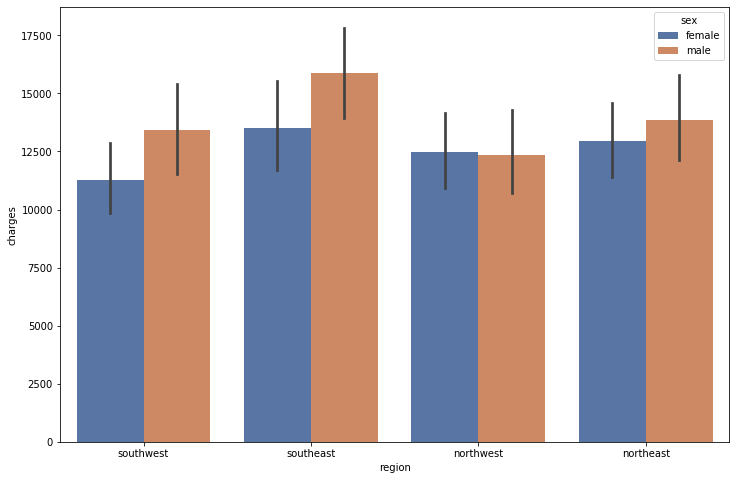

In [7]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='deep')


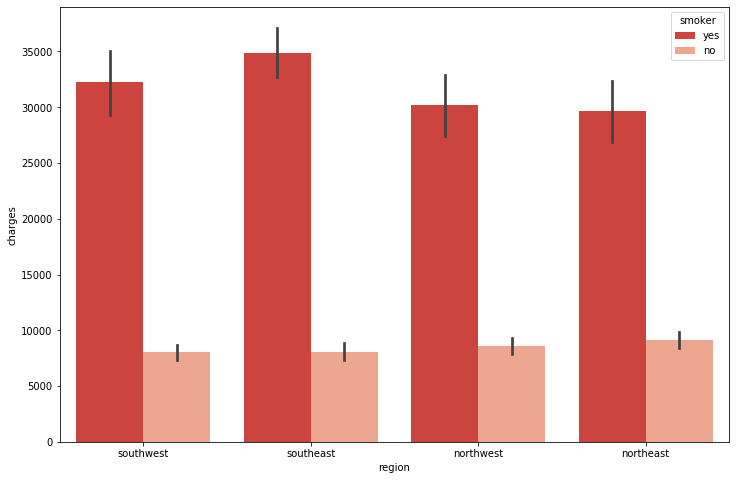

In [8]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

smokers have larger charges

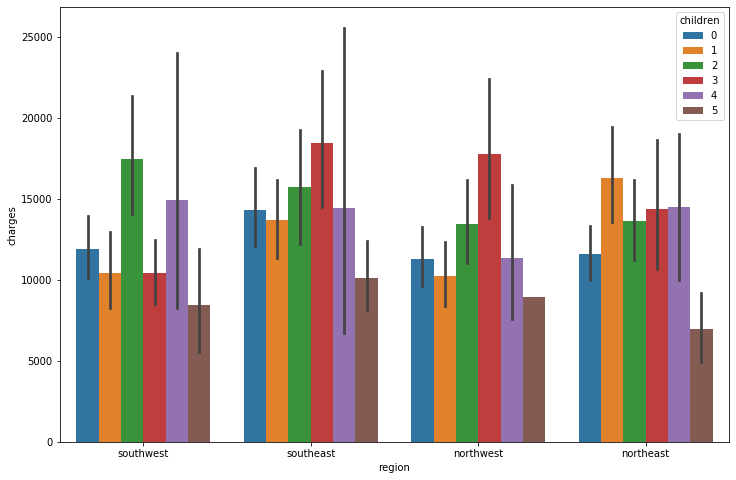

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df)

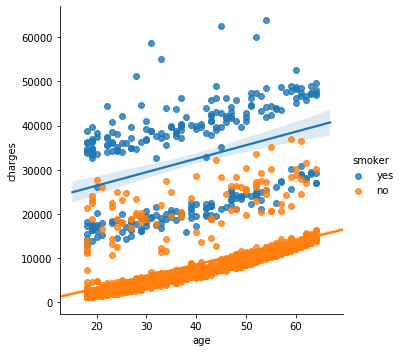

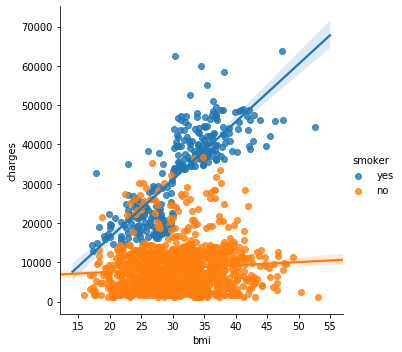

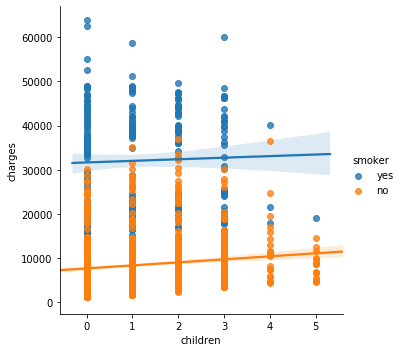

In [10]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker')

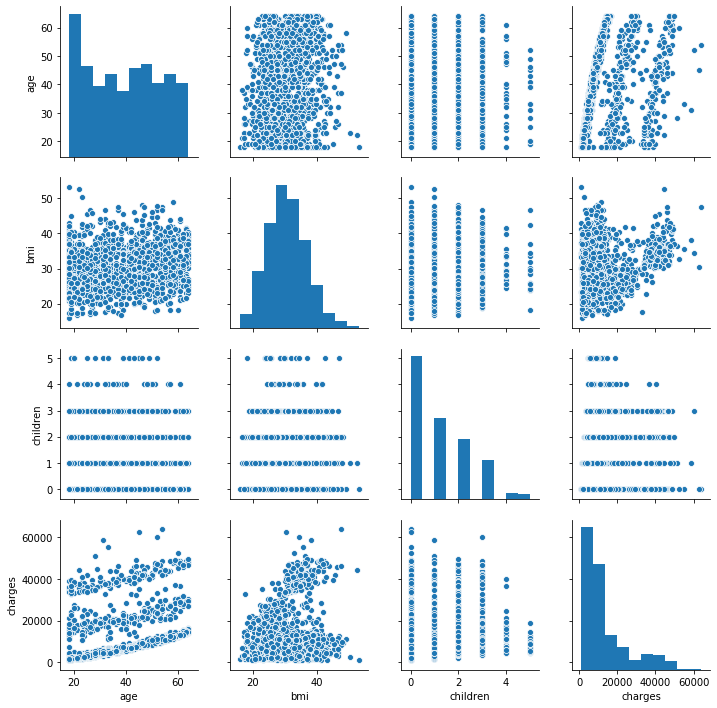

In [11]:
sns.pairplot(df)
#sns.set(rc = {'figure.figsize': (2:1)})

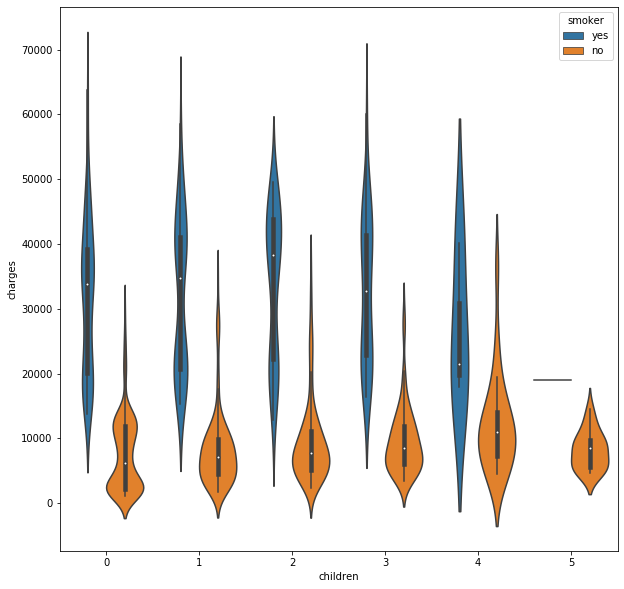

In [12]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker')

smoker have higher charges and 

## Convert categorical columns to numbers

In [13]:
from sklearn.preprocessing import OneHotEncoder

In [14]:
ohe = OneHotEncoder()

In [15]:
from sklearn.compose import make_column_transformer

In [16]:
smart_encoder=make_column_transformer ((ohe, ['smoker', 'region', 'sex']), 
                           remainder='passthrough')

In [17]:
df_ohe = smart_encoder.fit_transform(df)   #fit and transform on training


In [18]:
pd.DataFrame(df_ohe, columns=smart_encoder.get_feature_names_out())

,onehotencoder__smoker_no,onehotencoder__smoker_yes,onehotencoder__region_northeast,onehotencoder__region_northwest,onehotencoder__region_southeast,onehotencoder__region_southwest,onehotencoder__sex_female,onehotencoder__sex_male,remainder__age,remainder__bmi,remainder__children,remainder__charges
0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,19.0,27.900,0.0,16884.92400
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,18.0,33.770,1.0,1725.55230
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,28.0,33.000,3.0,4449.46200
3,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,33.0,22.705,0.0,21984.47061
4,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,32.0,28.880,0.0,3866.85520
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,50.0,30.970,3.0,10600.54830
1334,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,18.0,31.920,0.0,2205.98080
1335,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,18.0,36.850,0.0,1629.83350
1336,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,21.0,25.800,0.0,2007.94500


In [19]:
df2 = pd.DataFrame(df_ohe, columns=smart_encoder.get_feature_names_out())

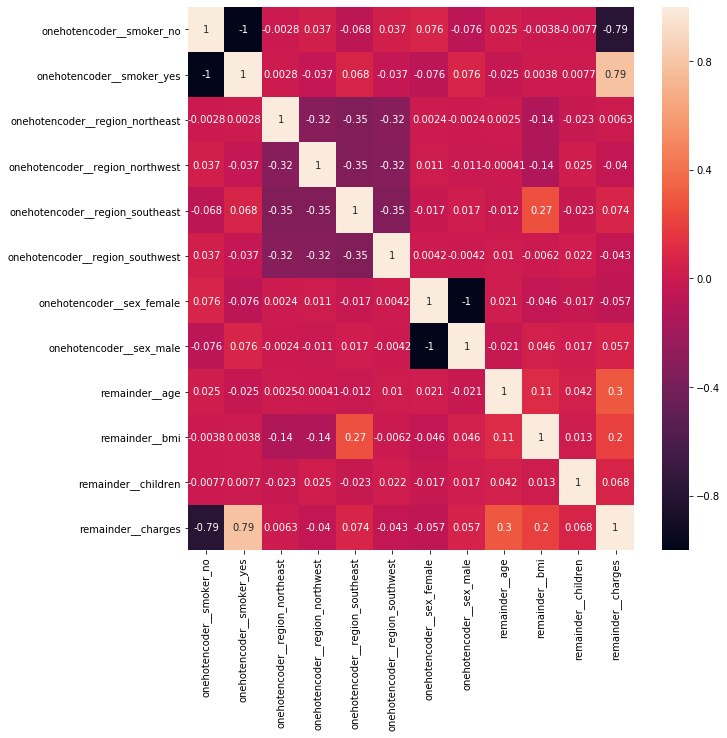

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df2.corr(), annot=True)

high correlation between smoking yes and charges

In [21]:
df2.columns

Index(['onehotencoder__smoker_no', 'onehotencoder__smoker_yes',
       'onehotencoder__region_northeast', 'onehotencoder__region_northwest',
       'onehotencoder__region_southeast', 'onehotencoder__region_southwest',
       'onehotencoder__sex_female', 'onehotencoder__sex_male',
       'remainder__age', 'remainder__bmi', 'remainder__children',
       'remainder__charges'],
      dtype='object')

In [22]:
X = df2.drop(['remainder__charges'], axis = 1)
y = df2['remainder__charges']

In [23]:
 X_train, X_test, y_train, y_test = train_test_split(X, y,  test_size= 0.20)

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr = LinearRegression().fit(X_train, y_train)

In [26]:
# make predictions
train_preds = lr.predict(X_train )
test_preds = lr.predict(X_test)

In [27]:
# get scores
from sklearn.metrics import mean_squared_error

In [28]:
mean_squared_error(y_test, test_preds) 

39179034.90497305

In [29]:
mean_squared_error(y_train, train_preds)

35885779.70978588

In [30]:
# cross val scores
from sklearn.model_selection import cross_val_score   #cv = 5 by default

In [31]:
cross_val_score(lr, X_train, y_train)    #r-squared values

array([0.76413096, 0.79966708, 0.75745663, 0.66648826, 0.71601342])

In [32]:
cross_val_score(lr, X_train,y_train, scoring = 'neg_mean_squared_error')

array([-34558942.46354499, -26103612.63453578, -42254363.308169  ,
       -34874538.41058198, -45074213.74969507])

In [33]:
# summarize score by average
np.mean(cross_val_score(lr, X_train,y_train, scoring = 'neg_mean_squared_error'))

-36573134.11330537

In [34]:
print(lr.score(X_test, y_test))

0.7507984481790353


In [38]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, test_preds))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, test_preds))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, test_preds)))

Mean Absolute Error: 4340.081616277647
Mean Squared Error: 39179034.90497305
Root Mean Squared Error: 6259.315849593552


## add polynomial features

In [39]:
from sklearn.preprocessing import PolynomialFeatures

In [40]:
#instantiate    FIT AND TRANSFORM
poly_features = PolynomialFeatures(degree = 2, include_bias = False)

In [41]:
#fit and transform training data
poly_features.fit_transform(X_train)

array([[0.0000000e+00, 1.0000000e+00, 0.0000000e+00, ..., 1.1833600e+03,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3586596e+03,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 9.2416000e+02,
        9.1200000e+01, 9.0000000e+00],
       ...,
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 7.6729000e+02,
        0.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 1.3727025e+03,
        7.4100000e+01, 4.0000000e+00],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 8.8804000e+02,
        5.9600000e+01, 4.0000000e+00]])

In [42]:
X_train_quad = poly_features.fit_transform(X_train)

In [43]:
#transform test data
X_test_quad = poly_features.transform(X_test) 

In [44]:
#fit the model
quad = LinearRegression().fit(X_train_quad, y_train)

In [47]:
#make predictions
quad.predict(X_test_quad)
quad.predict(X_train_quad)

array([34579.59375 ,  3448.46875 ,  8713.328125, ...,  4656.625   ,
        9448.140625,  6477.59375 ])

In [48]:
mean_squared_error(quad.predict(X_test_quad), y_test, squared = False)

4894.232637319463

In [49]:
print(quad.score(X_test_quad, y_test))

0.8476416621132664


In [50]:
# mean_squared_error(quad.predict(X_train_quad), y_test, squared = False)

In [51]:
##Predicting the charges
y_test_pred = quad.predict(X_test_quad)
##Comparing the actual output values with the predicted values
df_test = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test

,Actual,Predicted
1316,1731.67700,2812.546875
1203,9964.06000,12198.218750
72,11741.72600,12264.046875
409,4074.45370,5850.359375
979,4889.03680,6462.046875
...,...,...
1081,4454.40265,5585.578125
1207,38415.47400,35037.671875
214,8520.02600,9554.296875
1330,12629.16560,14413.718750


In [52]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error: 2798.2526455037314
Mean Squared Error: 23953513.10820302
Root Mean Squared Error: 4894.232637319463


## Add cubic features

In [53]:
#instantiate    FIT AND TRANSFORM
poly_features_cubic = PolynomialFeatures(degree = 3, include_bias = False)

In [54]:
#fit and transform training data
poly_features_cubic.fit_transform(X_train)

array([[0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.772480e+03,
        2.736000e+02, 2.700000e+01],
       ...,
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 2.745405e+03,
        1.482000e+02, 8.000000e+00],
       [1.000000e+00, 0.000000e+00, 0.000000e+00, ..., 1.776080e+03,
        1.192000e+02, 8.000000e+00]])

In [55]:
X_train_cubic = poly_features_cubic.fit_transform(X_train)

In [56]:
#transform test data
X_test_cubic = poly_features_cubic.transform(X_test) 

In [57]:
#fit the model
cube = LinearRegression().fit(X_train_cubic, y_train)

In [58]:
#make predictions
cube.predict(X_train_cubic)

array([37000.788517  ,  4420.51519394,  8194.25391006, ...,
        4542.68302536, 11224.07388306,  5977.87732315])

In [59]:
cube.predict(X_test_cubic)

array([ 3056.95929718, 12669.97088623, 13360.88529968,  4735.34264374,
        6211.653965  , 38633.74146271,  5976.39241791,  8452.76082993,
       14074.1184082 , 13606.07783508, 38434.10334396, 40392.08269882,
       13202.8948822 ,  3079.13191223,  4978.57892227, 14666.99106216,
        4016.42850494, 46053.74001694, 40860.14513397,  7701.2335434 ,
        6235.09152985, 35671.43751526,  4052.81555557,  1652.66643524,
       18049.2840538 , 45604.10586929,  2656.30070496, 14160.77985382,
        5787.10626984, 11703.68227386, 16090.28640747, 15848.65006638,
        2376.39546204, 13488.39439392,  5549.49215698, 12994.25707626,
        5234.61557007, 25256.1450386 ,  5407.54841232, 10076.02802658,
        7380.83098221,  5945.72231674, 16369.49742889, 10639.18686676,
       13831.53553772, 13340.20048141,  8733.04485321,  7389.66072845,
       12989.42079163,  9518.00127411,  5140.93274307, 13569.89930725,
        9387.7830925 , 21760.87735748,  8765.91899109,  8754.29460144,
      

In [60]:
mean_squared_error(cube.predict(X_test_cubic), y_test, squared = False)

4932.645246154042

In [61]:
print(cube.score(X_test_cubic, y_test))

0.8452406941149185


In [62]:
##Predicting the charges
y_test_pred_cube = cube.predict(X_test_cubic)
##Comparing the actual output values with the predicted values
df_test_cubic = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
df_test_cubic

,Actual,Predicted
1316,1731.67700,2812.546875
1203,9964.06000,12198.218750
72,11741.72600,12264.046875
409,4074.45370,5850.359375
979,4889.03680,6462.046875
...,...,...
1081,4454.40265,5585.578125
1207,38415.47400,35037.671875
214,8520.02600,9554.296875
1330,12629.16560,14413.718750


In [63]:
##Evaluating the performance of the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_test_pred_cube))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_test_pred_cube))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred_cube)))

Mean Absolute Error: 2897.065984471376
Mean Squared Error: 24330989.124406073
Root Mean Squared Error: 4932.645246154042


## quadratic model has the best predicting power

In [ ]:
#cross validate the pipeline
cross_val_score(quad_pipe, X_train, y_train, scoring = 'neg_mean_squared_error')

In [ ]:
# summarize score by average
np.mean(cross_val_score(cube, X_train_cubic, y_train, scoring = 'neg_mean_squared_error'))